# Face recognition

https://github.com/ageitgey/face_recognition

In [ ]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=ad686296bf10d682ee712b0c47d28d3e0c0e2e41a617e035b8bb3ad1a17deb5d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Make known and unknown directories

In [ ]:
!mkdir known unknown

Now upload your images (left click on files, import into the right folders)

* Base models in known with name as file name
* Pictures of these people in unknown

In [ ]:
from PIL import Image, ImageDraw
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import face_recognition

In [ ]:
def draw_rec(url1, url2, url3,url4,url5,url6,url7):
  # This is an example of running face recognition on a single image
  # and drawing a box around each person that was identified.

  # Load a sample picture and learn how to recognize it.
  chandler_image = face_recognition.load_image_file(url1)
  chandler_face_encoding = face_recognition.face_encodings(chandler_image)[0]

  # Load a second sample picture and learn how to recognize it.
  joey_image = face_recognition.load_image_file(url2)
  joey_face_encoding = face_recognition.face_encodings(joey_image)[0]

  monica_image=face_recognition.load_image_file(url3)
  monica_face_encoding=face_recognition.face_encodings(monica_image)[0]

  phoebe_image = face_recognition.load_image_file(url4)
  phoebe_face_encoding = face_recognition.face_encodings(phoebe_image)[0]

  rachel_image = face_recognition.load_image_file(url5)
  rachel_face_encoding = face_recognition.face_encodings(rachel_image)[0]

  ross_image = face_recognition.load_image_file(url6)
  ross_face_encoding = face_recognition.face_encodings(ross_image)[0]



  # Create arrays of known face encodings and their names
  known_face_encodings = [
      chandler_face_encoding,
      joey_face_encoding,
      monica_face_encoding,
      phoebe_face_encoding,
      rachel_face_encoding,
      ross_face_encoding
  ]
  known_face_names = [
      "chandler",
      "joey",
      "monica",
      "phoebe",
      "rachel",
      "ross"
  ]

  # Load an image with an unknown face
  test_image = face_recognition.load_image_file(url7)

  # Find all the faces and face encodings in the unknown image
  face_locations = face_recognition.face_locations(test_image)
  face_encodings = face_recognition.face_encodings(test_image, face_locations)

  # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
  # See http://pillow.readthedocs.io/ for more about PIL/Pillow
  pil_image = Image.fromarray(test_image)
  # Create a Pillow ImageDraw Draw instance to draw with
  draw = ImageDraw.Draw(pil_image)

  # Loop through each face found in the unknown image
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
      # See if the face is a match for the known face(s)
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

      name = "Unknown"

      # If a match was found in known_face_encodings, just use the first one.
      if True in matches:
          first_match_index = matches.index(True)
          name = known_face_names[first_match_index]

      # Draw a box around the face using the Pillow module
      draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

      # Draw a label with a name below the face
      text_width, text_height = draw.textsize(name)
      draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
      draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


  # Remove the drawing library from memory as per the Pillow docs
  del draw

  # Display the resulting image
  plt.imshow(pil_image, aspect='auto')

  # You can also save a copy of the new image to disk if you want by uncommenting this line
  # pil_image.save("image_with_boxes.jpg")

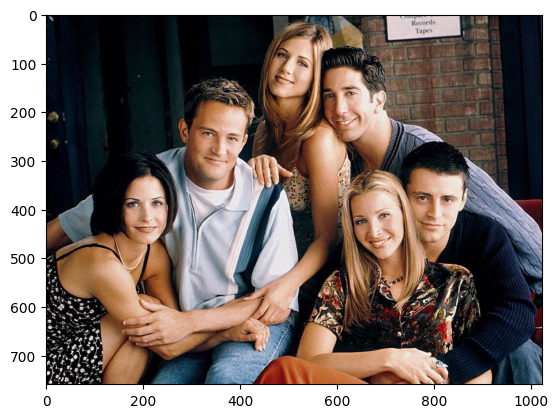

In [ ]:
plt.imshow(Image.fromarray(face_recognition.load_image_file("unknown/test.jpg")), aspect='auto')

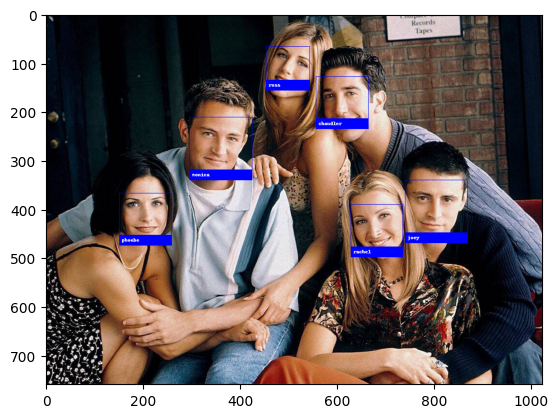

In [ ]:
draw_rec("known/ross.jpg", "known/joey.jpg", "known/chandler.jpg", "known/monica.jpg", "known/phoebe.jpg", "known/rachel.jpg", "unknown/test.jpg")